# Checkpoint 2: Step function

SO the way things are encoded only accounts for the rubiks cube to have the following moves whilst keeping the front face the same at all times:

1. F
2. F'
3. U
4. U'
4. R
4. R'

The other 6 actions are all complimentary to these for the 2x2 cube, so actions for these can still be accepted but will require a rotation of the cube to keep the front face the same (so each of those actions is essentially equilvalent to the above ones)

1. B + rotate cube counterclockwise keeping front face same -> F'
2. B' + rotate cube clockwise keeping front -> F
3. D + rotate cube right (counterclockwise) to new front face -> U'
5. D' + rotate cube left (clockwise) to new front face -> U
4. L + flip cube up -> R
4. L' + flip cube down -> R'

I implemented the environment to accept all 12 actions, but the latter 6 essentially default to the first 6.

In [1]:
import pandas as pd
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# valid states are in this array (previously defined)
valid_states = np.loadtxt('2x2states.txt', dtype=str)

In [3]:
valid_states

array(['WWWWRRBBOOGGGGRRBBOOYYYY', 'WBWRRRBYBOWGGGRYBOWOYOYG',
       'WWRBBYBOWGRRGGRYBOWOYOYG', ..., 'WGWGOOGYRRWBGYRRWBOOBBYY',
       'WWGGGYRRWBOOGYRRWBOOBBYY', 'WWWWGGRRBBOOGGRRBBOOYYYY'],
      dtype='<U24')

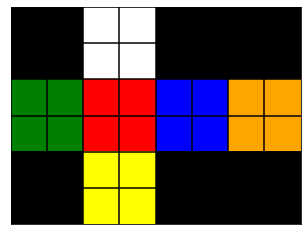

3674159

In [7]:
# terminal state
state_terminal = np.where(valid_states == 'WWWWGGRRBBOOGGRRBBOOYYYY')[0][0]
visualize_cube(valid_states[state_terminal])
state_terminal

In [6]:
def visualize_cube(state_str):
    """
    Takes in string representation of state as represented in valid_states txt file
    """
    
    maps = {'W':1, 'G':2, 'R':3, 'O':4, 'B':5, 'Y':6}

    viz = np.zeros((6,8))
    cube = [maps[i] for i in state_str]

    viz[:2,2:4] = np.array(cube[:4]).reshape(2,2)
    viz[2:4,:] = np.array(cube[4:20]).reshape(2,8)
    viz[4:,2:4] = np.array(cube[20:]).reshape(2,2)

    cmap = colors.ListedColormap(['black', 'white', 'green', 'red', 'orange', 'blue', 'yellow'])
    bounds = np.arange(-.5, 7, 1)
    norm = colors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(viz, cmap=cmap, norm=norm)
    plt.vlines(x=np.arange(0.5, 7, 1), ymin=-.5, ymax=5.5)
    plt.hlines(y=np.arange(0.5, 5, 1), xmin=-.5, xmax=7.5)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [8]:
def rotate(str_list, ind_list, clockwise):
    """
    Rotates rotates the indeces in the string representation of the state
    
    parameters
    -----------
    str_list: list representation of the state's string representation
    ind_list: 3x4 list where each sublist is the list of indeces to rotate
    clockwise: boolean, direction to rotate given indeces
    
    returns
    --------
    str_list: new list representation with rotated indeces
    """
    if clockwise:
        for inds in ind_list:
            l = str_list[inds[-1]]
            for i in range(3, 0, -1):
                str_list[inds[i]] = str_list[inds[i-1]]
            str_list[inds[0]] = l
    else:
        for inds in ind_list:
            l = str_list[inds[0]]
            for i in range(3):
                str_list[inds[i]] = str_list[inds[i+1]]
            str_list[inds[-1]] = l
            
    return str_list

In [9]:
def step(state, action):
    """
    Given a state and action, executes that action and returns the new state and reward
    
    parameters
    -----------
    state: integer representation of current state (index of string representation in valid_states)
    action: integer representation of action to take
        action indeces: [0/F, 1/F', 2/U, 3/U', 4/R, 5/R', 6/B, 7/B', 8/D, 9/D', 10/L, 11/L']
        
    returns
    -------
    state_new: integer representation of next state
    reward
    """
    
    state_str = valid_states[state]
    
    if action in [0,1,6,7]:
        inds = [[5,3,16,20],[13,2,8,21],[6,7,15,14]]
        clockwise = True if action in [0,7] else False
    elif action in [2,3,8,9]:
        inds = [[0,1,3,2],[6,4,10,8],[7,5,11,9]]
        clockwise = True if action in [2,9] else False
    elif action in [4,5,10,11]:
        inds = [[8,9,17,16],[7,1,18,21],[15,3,10,23]]
        clockwise = True if action in [4,10] else False
    
    str_list = rotate(list(state_str), inds, clockwise=clockwise)
    new_str = ''.join([i for i in str_list])
    state_new = np.where(valid_states == new_str)[0][0]
    
    reward = -1 # -1 reward for all time steps
    
    return state_new, reward
        

## Check if all/most state/action pairs result in a valid state

The rotate function will throw an error if a string representation of the state doesn't exist in it

In [15]:
# checking for 1000 iterations with random actions
# throws error if state isn't valid
state = state_terminal
for i in range(1000):
    new_state,r = step(state, np.random.randint(12))
    state = new_state

## Check that step function works correctly

Checking all actions starting from the terminal state in random order. Notice that all rotations result in the right ordering of cube locations, and that opposite actions (for example D then D', and L' then L) result in opposite rotations of the cube and return back to previous states.

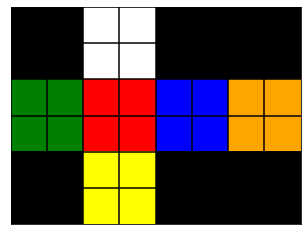

ACTION: R


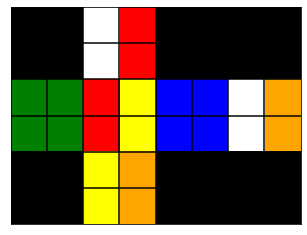

ACTION: B'


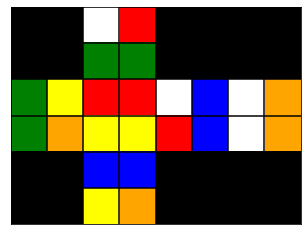

ACTION: U


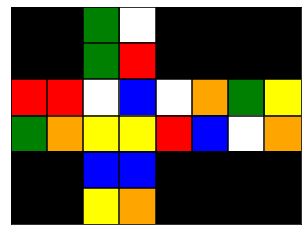

ACTION: F'


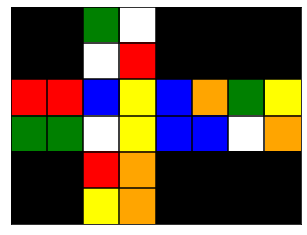

ACTION: U'


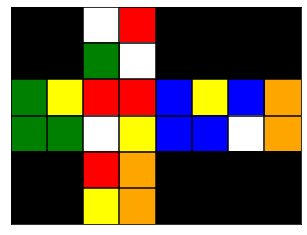

ACTION: D


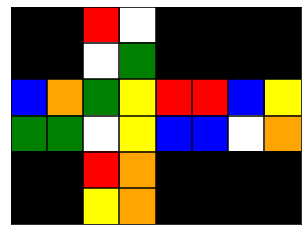

ACTION: D'


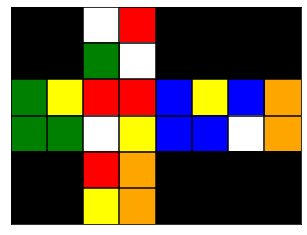

ACTION: L'


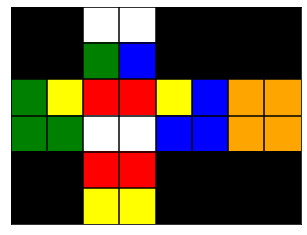

ACTION: L


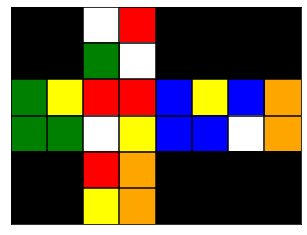

ACTION: F


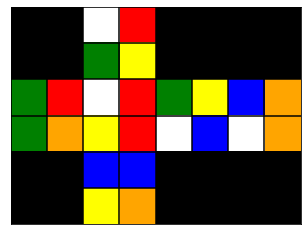

ACTION: B


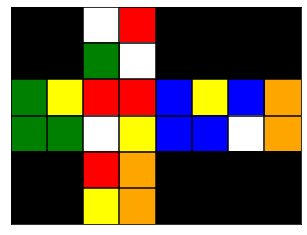

ACTION: R'


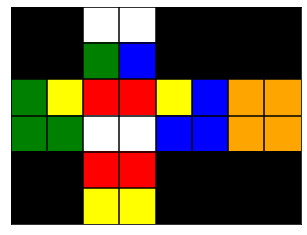

In [18]:
# see moves from terminal state (solved cube)
actions = [4,7,2,1,3,8,9,11,10,0,6,5]
action_names = ['F', 'F\'', 'U', 'U\'', 'R', 'R\'', 'B', 'B\'', 'D', 'D\'', 'L', 'L\'']
state = state_terminal
visualize_cube(valid_states[state])
for a in actions:
    new_state,r = step(state, a)
    print('ACTION: {}'.format(action_names[a]))
    visualize_cube(valid_states[new_state])
    state = new_state